In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
            

In [2]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

# al variare del taglio

filesCut = {}
for i in range(10, 100, 10):
    val = glob.glob(f'csv/approx_cut/csv_c*_n*_r*_fn*_mode*_div*_cut{i}.csv')
    
    if val != []:
        filesCut[i] = val

filesDiv = {}
for i in [10**n for n in range(5)]:
    val = glob.glob(f'csv/approx_div/csv_c*_n*_r*_fn*_mode*_div{i}_cut*.csv')
    if val != []:
        filesDiv[i] = val

dataframeCut = []
for i in filesCut:
    for filename in filesCut[i]:
        df = pd.read_csv(filename)
        df['n'] = i
        df['difference_v2'] = abs(df['res_original_alloc']-df['resOpt_v2_1_cut'])
        dataframeCut.append(df)
        

resultCut = pd.concat(dataframeCut, axis=0, ignore_index=True)

dataframeDiv = []
for i in filesDiv:
    for filename in filesDiv[i]:
        df = pd.read_csv(filename)
        df['n'] = i
        df['difference_v1'] = abs(df['res_original_alloc']-df['resOpt_v1_1_div'])
        dataframeDiv.append(df)

resultDiv = pd.concat(dataframeDiv, axis=0, ignore_index=True)


print(filesDiv);
resultCut.columns


{10: ['csv/approx_div\\csv_c50000_n100_r50000_fn100_mode4_div10_cut10.csv'], 100: ['csv/approx_div\\csv_c50000_n100_r50000_fn100_mode4_div100_cut10.csv'], 1000: ['csv/approx_div\\csv_c50000_n100_r50000_fn100_mode4_div1000_cut10.csv'], 10000: ['csv/approx_div\\csv_c50000_n100_r50000_fn100_mode4_div10000_cut10.csv']}


Index(['type', 'capacity', 'n', 't_v1', 't_v2', 's_v1', 's_v2',
       't_size_v1_div', 't_size_v2_cut', 's_sizev1_div', 's_size_v2_cut',
       'time_v1', 'time_v2', 'time_v1_div', 'time_v2_cut',
       'time_original_prealloc', 'time_ks2_v1_1', 'time_ks2_v2_1',
       'time_ks2_v1_1_div', 'time_ks2_v2_1_cut', 'res_original_alloc',
       'resOpt_v1_1', 'resOpt_v2_1', 'resOpt_v1_1_div', 'resOpt_v2_1_cut',
       'difference_v2'],
      dtype='object')

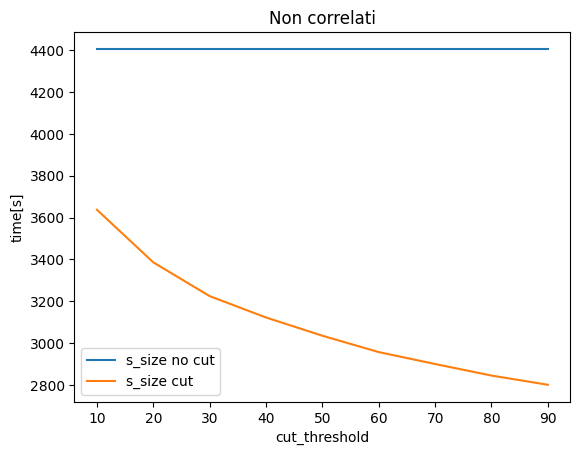

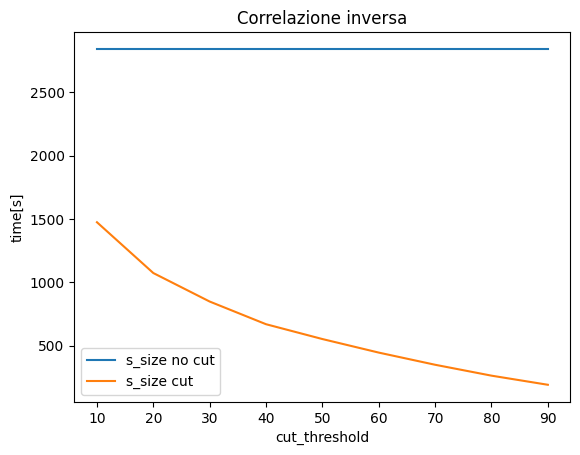

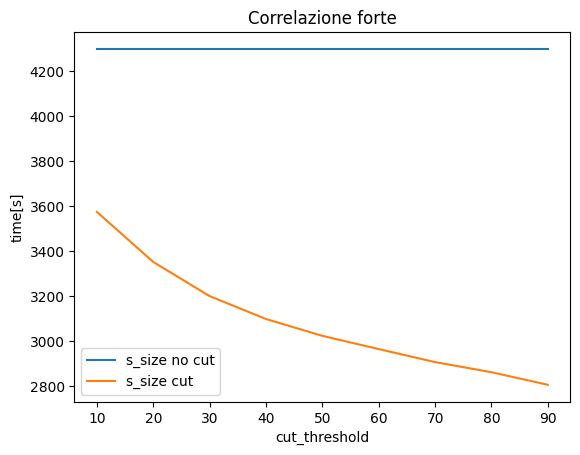

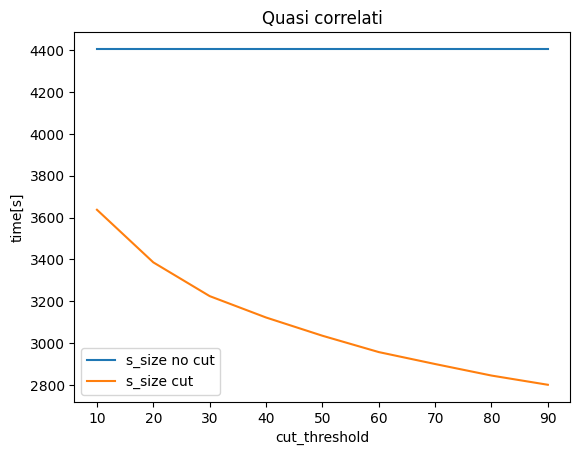

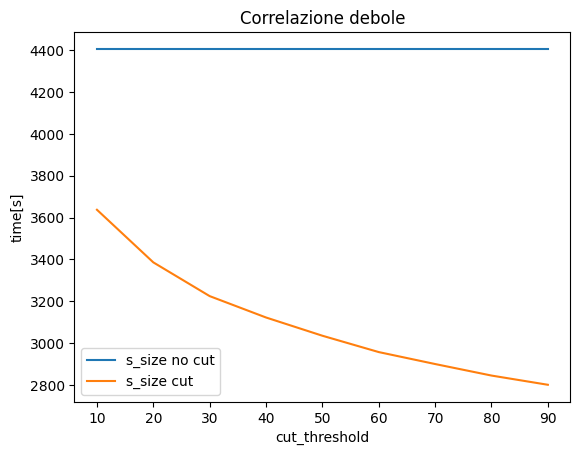

In [3]:
# CUT
n = resultCut['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = resultCut[resultCut['type']==i]
    
    
    sv1 = result1.groupby('n')['s_v2'].mean()
    sv2 = result1.groupby('n')['s_size_v2_cut'].mean()

    plt.plot(n, sv1, label='s_size no cut')
    plt.plot(n, sv2, label='s_size cut')
    plt.xlabel('cut_threshold')
    plt.ylabel('time[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


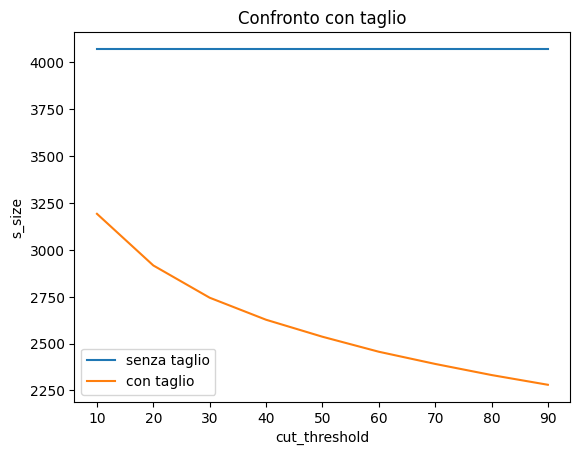

In [4]:
# CUT MONOGRAFICO
sv1 = resultCut.groupby('n')['s_v2'].mean()
sv2 = resultCut.groupby('n')['s_size_v2_cut'].mean()

plt.plot(n, sv1, label='senza taglio')
plt.plot(n, sv2, label='con taglio')
plt.xlabel('cut_threshold')
plt.ylabel('s_size')
plt.title("Confronto con taglio")
plt.legend()
plt.show()



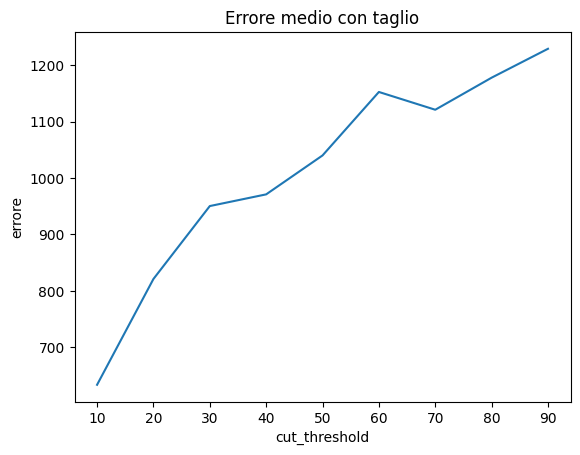

In [5]:
# RISULTATI CON TAGLIO
n = resultCut['n'].unique()
sv1 = resultCut.groupby('n')['difference_v2'].mean()
plt.plot(n, sv1)
plt.xlabel('cut_threshold')
plt.ylabel('errore')
plt.title("Errore medio con taglio")
plt.show()

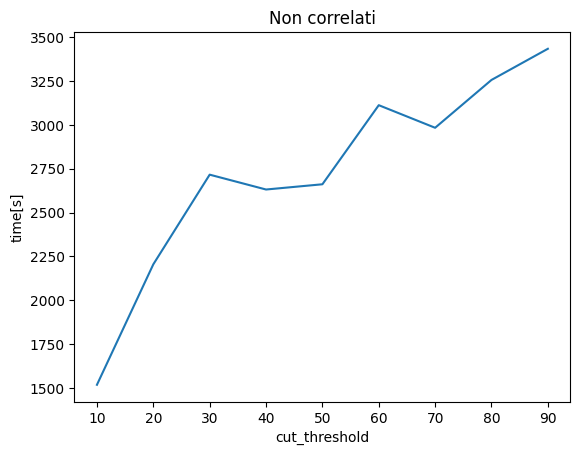

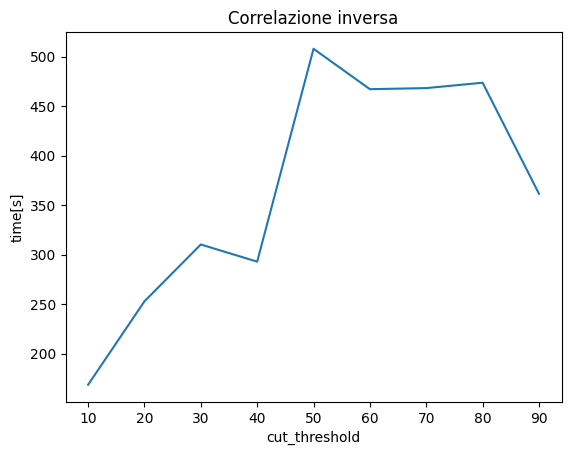

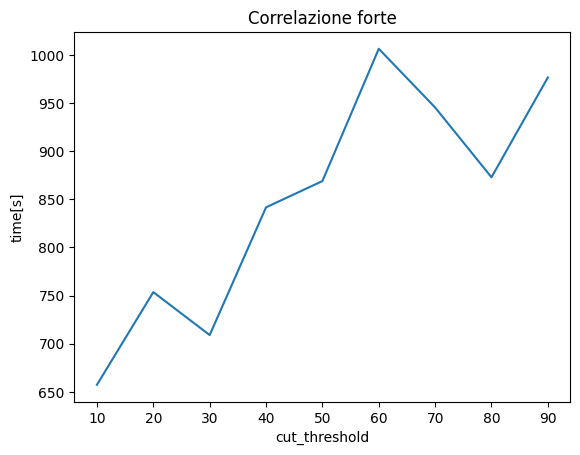

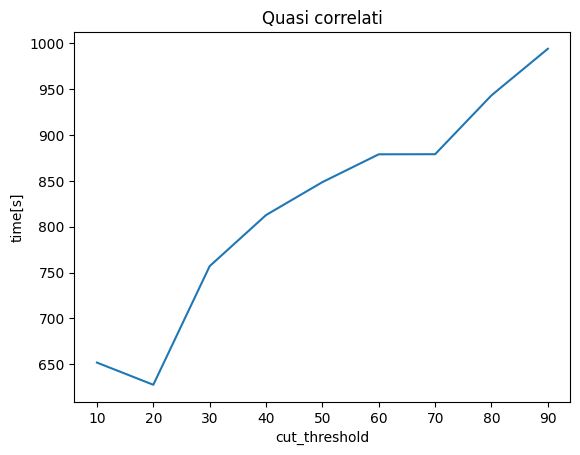

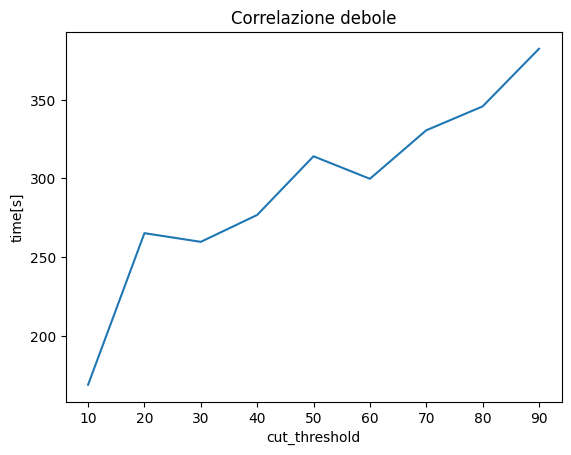

In [6]:
# distanza RISULTATI CON TAGLIO DIVISI
n = resultCut['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = resultCut[resultCut['type']==i]
    
    sv1 = result1.groupby('n')['difference_v2'].mean()

    plt.plot(n, sv1)
    plt.xlabel('cut_threshold')
    plt.ylabel('time[s]')
    plt.title(types_conv[cont])
    plt.show()

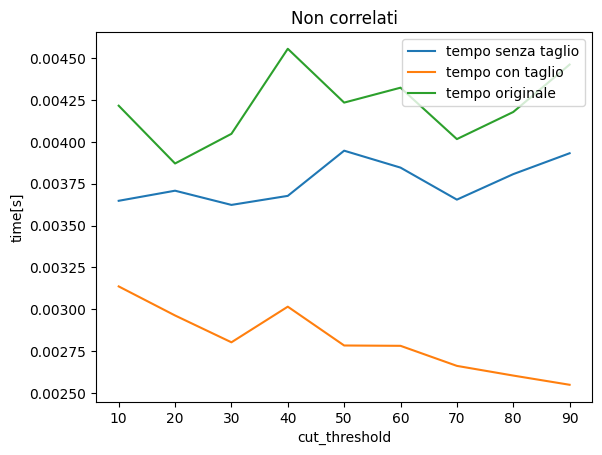

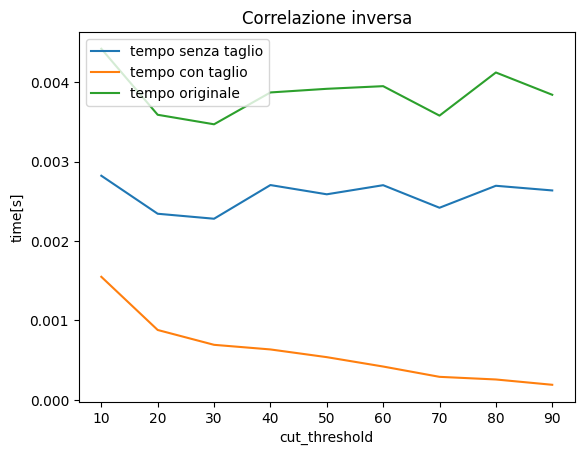

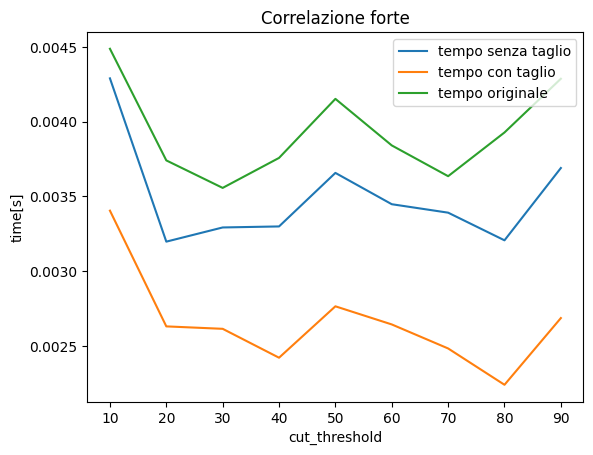

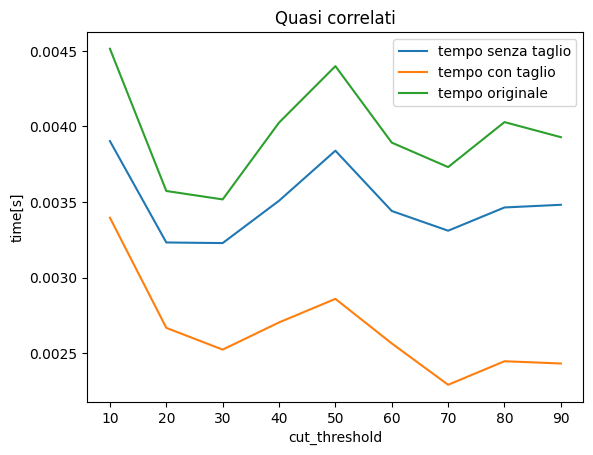

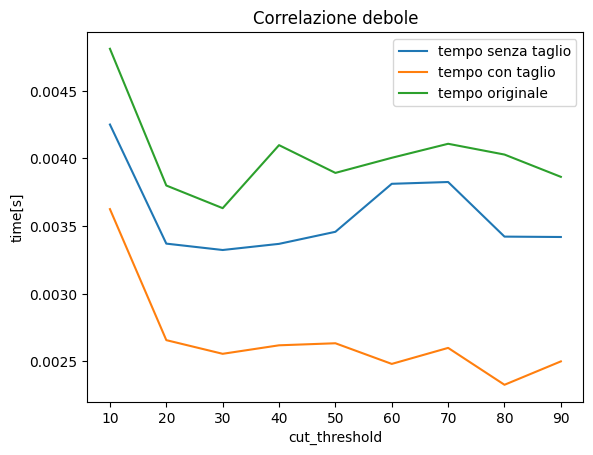

In [7]:
# tempi con taglio
n = resultCut['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = resultCut[resultCut['type']==i]
    
    
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()

    plt.plot(n, sv1, label='tempo senza taglio')
    plt.plot(n, sv2, label='tempo con taglio')
    plt.plot(n, sv3, label='tempo originale')
    plt.xlabel('cut_threshold')
    plt.ylabel('time[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


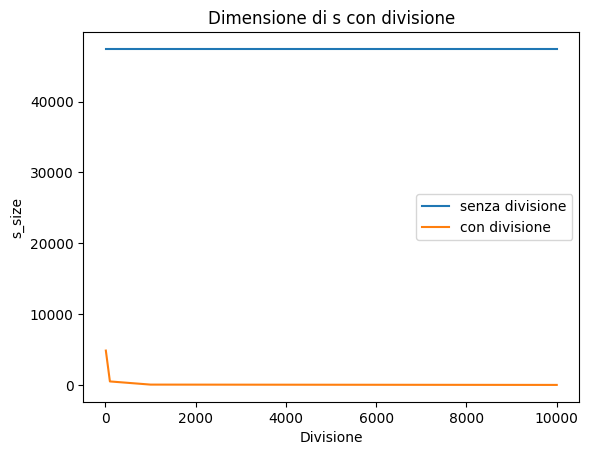

In [8]:
# DIV MONOGRAFICO
n = resultDiv['n'].unique()
sv1 = resultDiv.groupby('n')['s_v1'].mean()
sv2 = resultDiv.groupby('n')['s_sizev1_div'].mean()

plt.plot(n, sv1, label='senza divisione')
plt.plot(n, sv2, label='con divisione')
plt.xlabel('Divisione')
plt.ylabel('s_size')
plt.title("Dimensione di s con divisione")
plt.legend()
plt.show()


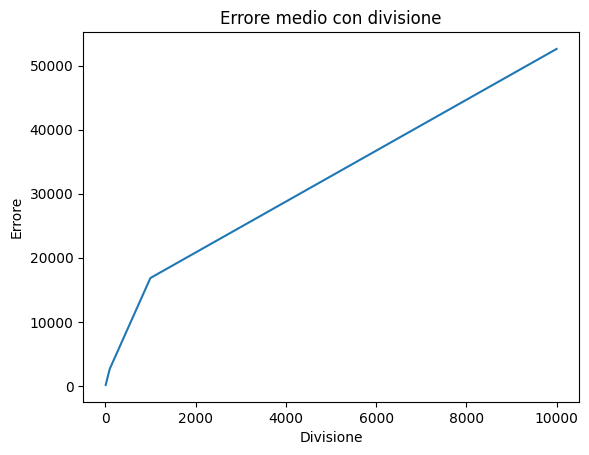

In [9]:
# errore con divisione
n = resultDiv['n'].unique()
sv1 = resultDiv.groupby('n')['difference_v1'].mean()
plt.plot(n, sv1)
plt.xlabel('Divisione')
plt.ylabel('Errore')
plt.title("Errore medio con divisione")
plt.show()


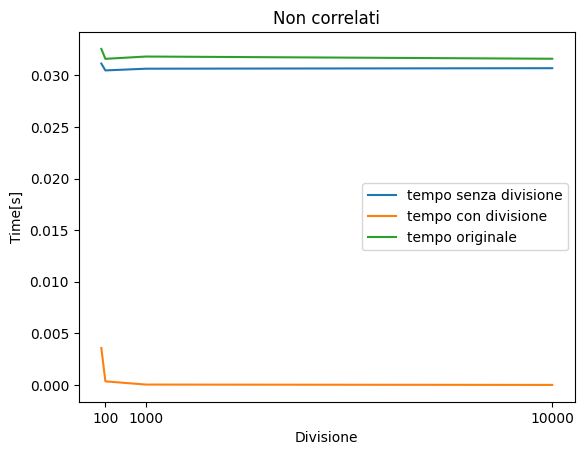

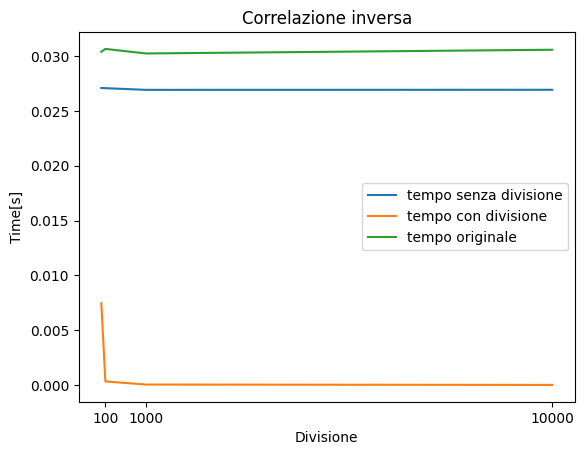

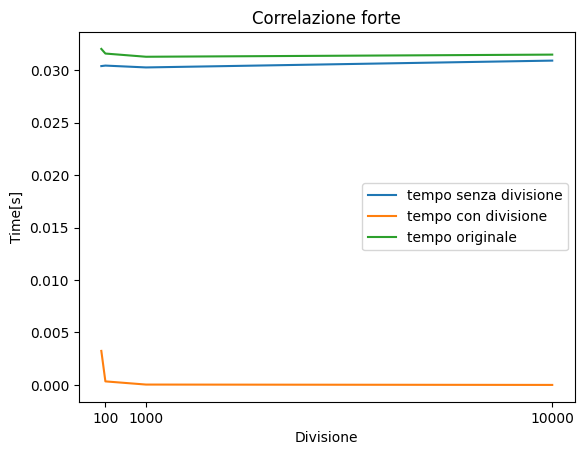

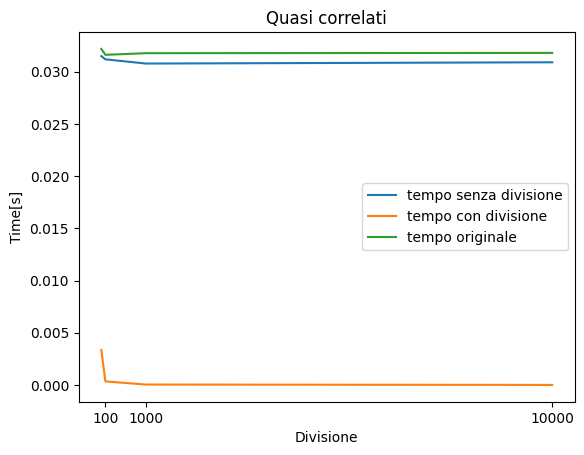

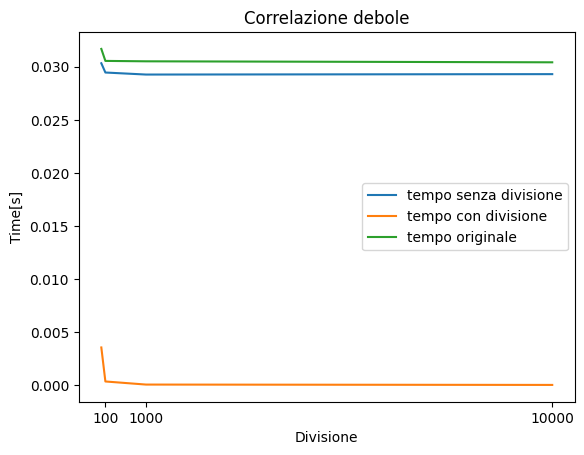

In [10]:
# tempi con divisione
n = resultDiv['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = resultDiv[resultDiv['type']==i]
    
    
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v1_1_div'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()

    plt.plot(n, sv1, label='tempo senza divisione')
    plt.plot(n, sv2, label='tempo con divisione')
    plt.plot(n, sv3, label='tempo originale')
    plt.xlabel('Divisione')
    plt.ylabel('Time[s]')
    plt.xticks([100, 1000, 10000])
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


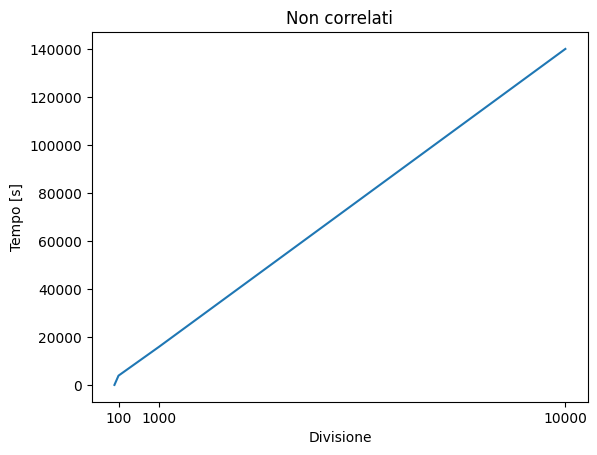

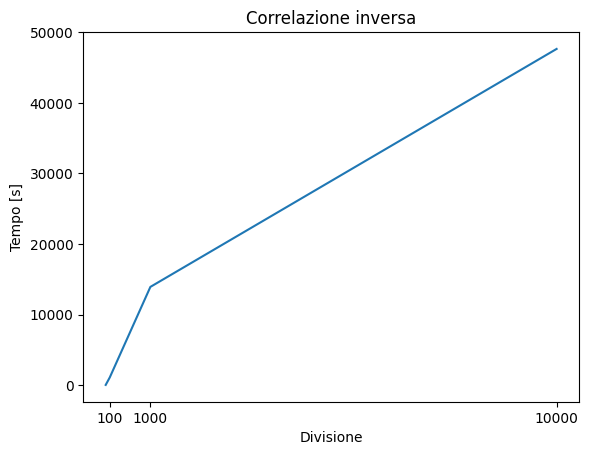

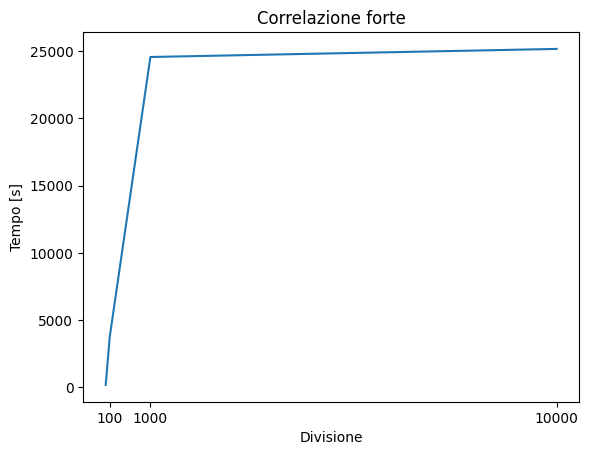

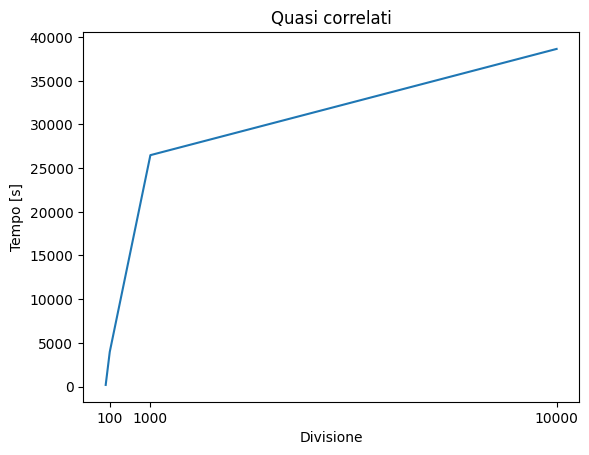

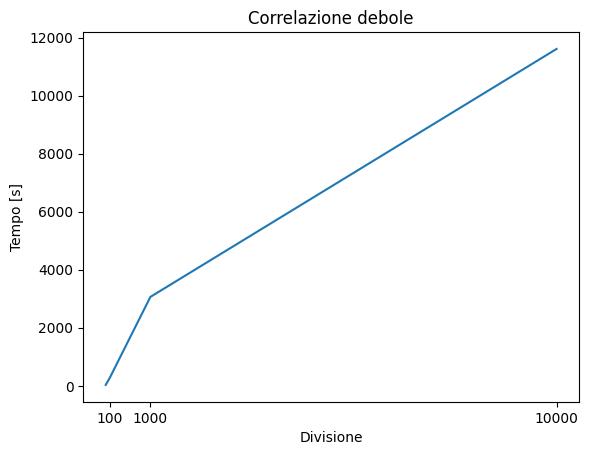

In [11]:
# distanza RISULTATI CON DIVISIONE DIVISI
n = resultDiv['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = resultDiv[resultDiv['type']==i]
    
    sv1 = result1.groupby('n')['difference_v1'].mean()

    plt.plot(n, sv1)
    plt.xlabel('Divisione')
    plt.ylabel('Tempo [s]')
    plt.xticks([100, 1000, 10000])
    plt.title(types_conv[cont])
    plt.show()